In [158]:
import os
cwd = os.getcwd()
print(cwd)

/Users/wurobin/Documents/Myfolder/機器學習/Python_train


In [42]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
x = iris.data[:, 2:]
y = iris.target

a = iris.feature_names[2:]
print("{0}".format(a))

a = iris.target_names
print("{0}".format(a))

['petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
a = !pwd
a
#print("{0}".format(a))

['/Users/wurobin/Documents/Myfolder/機器學習/Python_train']

In [43]:
# Load in our libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
train_dn = train.drop("Cabin", axis=1)
train_dn = train_dn.dropna()
train_dn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [8]:
train_dn.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [9]:
train_dn.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,712.0,448.589888,258.683191,1.00,222.75,445.00000,677.25,891.0000
Survived,712.0,0.404494,0.491139,0.00,0.00,0.00000,1.00,1.0000
Pclass,712.0,2.240169,0.836854,1.00,1.00,2.00000,3.00,3.0000
Age,712.0,29.642093,14.492933,0.42,20.00,28.00000,38.00,80.0000
SibSp,712.0,0.514045,0.930692,0.00,0.00,0.00000,1.00,5.0000
Parch,712.0,0.432584,0.854181,0.00,0.00,0.00000,1.00,6.0000
Fare,712.0,34.567251,52.938648,0.00,8.05,15.64585,33.00,512.3292


In [10]:
train_dn.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S


In [11]:
train_dn_label = train_dn["Fare"]
train_dn_data = train_dn.drop('Fare',axis=1)

train_dn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Embarked     712 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 61.2+ KB


In [45]:
Q1 = train_dn.quantile(0.25)
Q3 = train_dn.quantile(0.75)
IQR = Q3 - Q1

a = Q1
print("{0} \n".format(a))

a = Q3
print("{0} \n".format(a))

a = IQR
print("{0} \n".format(a))

PassengerId    222.75
Survived         0.00
Pclass           1.00
Age             20.00
SibSp            0.00
Parch            0.00
Fare             8.05
Name: 0.25, dtype: float64 

PassengerId    677.25
Survived         1.00
Pclass           3.00
Age             38.00
SibSp            1.00
Parch            1.00
Fare            33.00
Name: 0.75, dtype: float64 

PassengerId    454.50
Survived         1.00
Pclass           2.00
Age             18.00
SibSp            1.00
Parch            1.00
Fare            24.95
dtype: float64 



In [46]:
train_dn = train_dn[ (train_dn["Fare"]>=Q1["Fare"]-IQR["Fare"]*1.5) & (train_dn["Fare"]<=Q3["Fare"]+IQR["Fare"]*1.5)]



In [47]:
train_dn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  617 non-null    int64  
 1   Survived     617 non-null    int64  
 2   Pclass       617 non-null    int64  
 3   Name         617 non-null    object 
 4   Sex          617 non-null    object 
 5   Age          617 non-null    float64
 6   SibSp        617 non-null    int64  
 7   Parch        617 non-null    int64  
 8   Ticket       617 non-null    object 
 9   Fare         617 non-null    float64
 10  Embarked     617 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 57.8+ KB


In [38]:
train_dn.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Female,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,0,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,0,0,1


In [39]:
##train_dn['Mrs'] = train_dn["Name"].apply(lambda x: 1 if any(y in x for y in ("Mrs","Miss","Lady")) else 0)
##train_dn['Female_2'] = train_dn['Sex'].apply(lambda x: '1' if x=="female" else '0')
#train_dn.loc[train_dn['Sex'] != 'female', 'Female'] = '0'  
#train_dn.loc[train_dn['Sex'] == 'female', 'Female'] = '1'  

In [48]:
train_dn.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S


In [49]:
train_dn = pd.get_dummies(train_dn, columns=["Sex","Embarked"])

In [66]:
train_dn.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.250,0,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.925,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.100,1,0,0,0,1


In [70]:
from sklearn import tree

max_depth = 2
min_samples_split = 2

y = train_dn["Survived"]

x = train_dn.drop(["Survived","Name","Ticket"],axis=1)

#clf = tree.DecisionTreeClassifier(max_depth=2)
clf = tree.DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, random_state = 1)
clf = clf.fit(x, y)


#train_columns = list(train_dn.columns)
train_columns = list(train_dn.drop(["Survived","Name","Ticket"],axis=1).columns)
class_name = list(set(train_dn["Survived"]))
#class_names = list(set(train_dn["Survived"]))

#for e in ("PassengerId","Survived","Name","Sex","Ticket"):
#    train_columns.remove(e)
    
#train_columns


In [69]:
list(set(train_dn["Survived"]))

[0, 1]

In [72]:
train_dn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  617 non-null    int64  
 1   Survived     617 non-null    int64  
 2   Pclass       617 non-null    int64  
 3   Name         617 non-null    object 
 4   Age          617 non-null    float64
 5   SibSp        617 non-null    int64  
 6   Parch        617 non-null    int64  
 7   Ticket       617 non-null    object 
 8   Fare         617 non-null    float64
 9   Sex_female   617 non-null    uint8  
 10  Sex_male     617 non-null    uint8  
 11  Embarked_C   617 non-null    uint8  
 12  Embarked_Q   617 non-null    uint8  
 13  Embarked_S   617 non-null    uint8  
dtypes: float64(2), int64(5), object(2), uint8(5)
memory usage: 51.2+ KB


In [73]:
train_dn["Survived"].value_counts()

0    397
1    220
Name: Survived, dtype: int64

In [74]:
train_dn["Sex_male"].value_counts()

1    414
0    203
Name: Sex_male, dtype: int64

In [96]:
train_dn.groupby("Sex_male").count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
Sex_male,,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203,203
1,414,414,414,414,414,414,414,414,414,414,414,414,414


In [97]:
train_dn[(train_dn.Survived==1)].groupby("Sex_male").count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
Sex_male,,,,,,,,,,,,,
0,141,141,141,141,141,141,141,141,141,141,141,141,141
1,79,79,79,79,79,79,79,79,79,79,79,79,79


In [98]:
a = train_dn[(train_dn.Survived==1)].groupby("Sex_male").count()
b = train_dn.groupby("Sex_male").count()
a/b

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
Sex_male,,,,,,,,,,,,,
0,0.694581,0.694581,0.694581,0.694581,0.694581,0.694581,0.694581,0.694581,0.694581,0.694581,0.694581,0.694581,0.694581
1,0.190821,0.190821,0.190821,0.190821,0.190821,0.190821,0.190821,0.190821,0.190821,0.190821,0.190821,0.190821,0.190821


In [93]:
train_dn[(train_dn.Sex_male==0)]["Pclass"].value_counts()
#x = train_exclude_age_null[["Age"]][(train_exclude_age_null.Sex=="male") & (train_exclude_age_null.Survived>0)]

3    102
2     74
1     27
Name: Pclass, dtype: int64

In [137]:
train_dn['Survived'].mean()
#train_dn['Survived'].mean()
train_dn[['Sex_male', 'Survived']].groupby(['Sex_male'], as_index=False).mean()

#train_dn['Survived'].groupby("Sex_male").mean()

,Sex_male,Survived
0,0,0.694581
1,1,0.190821


In [157]:

pd.set_option('display.max_columns', None)#展開所有欄位
pd.set_option('display.max_rows', None)#展開所有欄位

#cn = train_dn.columns.tolist()
cn = train_dn.drop('PassengerId',axis=1).columns.tolist()

for col in cn:
    #display(ap_data_dummy[col].value_counts(ascending=True).head(5).to_frame())
    display(train_dn[[col, 'Survived']].groupby([col], as_index=False).mean())

ValueError: Grouper for 'Survived' not 1-dimensional

In [156]:
  
train_dn.drop('PassengerId',axis=1).head(5)

a = train_dn.drop('PassengerId',axis=1).columns.tolist()
print("{0}".format(a))    


['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


In [133]:
train_dn.describe(include="all")

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,617.000000,617.000000,617.000000,617,617.000000,617.000000,617.000000,617,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000
unique,NaN,NaN,NaN,617,NaN,NaN,NaN,498,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,"Rekic, Mr. Tido",NaN,NaN,NaN,347082,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN
mean,448.165316,0.356564,2.423015,NaN,28.919368,0.487844,0.398703,NaN,19.026803,0.329011,0.670989,0.139384,0.042139,0.818476
std,262.818184,0.479373,0.741393,NaN,14.326895,0.953598,0.846995,NaN,14.282146,0.470235,0.470235,0.346628,0.201070,0.385764
min,1.000000,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,211.000000,0.000000,2.000000,NaN,20.000000,0.000000,0.000000,NaN,7.925000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,447.000000,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,NaN,13.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,679.000000,1.000000,3.000000,NaN,36.500000,1.000000,0.000000,NaN,26.283300,1.000000,1.000000,0.000000,0.000000,1.000000


In [101]:
from sklearn import tree

max_depth = 3
min_samples_split = 3

y = train_dn["Survived"]

x = train_dn.drop(["Survived","Name","Ticket"],axis=1)

#clf = tree.DecisionTreeClassifier(max_depth=2)
clf = tree.DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, random_state = 1)
clf = clf.fit(x, y)


#train_columns = list(train_dn.columns)
train_columns = list(train_dn.drop(["Survived","Name","Ticket"],axis=1).columns)
class_name = list(set(train_dn["Survived"]))
#class_names = list(set(train_dn["Survived"]))

#for e in ("PassengerId","Survived","Name","Sex","Ticket"):
#    train_columns.remove(e)
    
#train_columns



In [126]:
list(
    set(
        train_dn["Survived"].astype("str")
    )
)



['1', '0']

In [104]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_7 <= 0.50
|   |--- feature_1 <= 2.50
|   |   |--- feature_2 <= 56.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  56.00
|   |   |   |--- class: 0
|   |--- feature_1 >  2.50
|   |   |--- feature_5 <= 20.80
|   |   |   |--- class: 1
|   |   |--- feature_5 >  20.80
|   |   |   |--- class: 0
|--- feature_7 >  0.50
|   |--- feature_2 <= 3.50
|   |   |--- feature_3 <= 2.50
|   |   |   |--- class: 1
|   |   |--- feature_3 >  2.50
|   |   |   |--- class: 0
|   |--- feature_2 >  3.50
|   |   |--- feature_1 <= 1.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  1.50
|   |   |   |--- class: 0



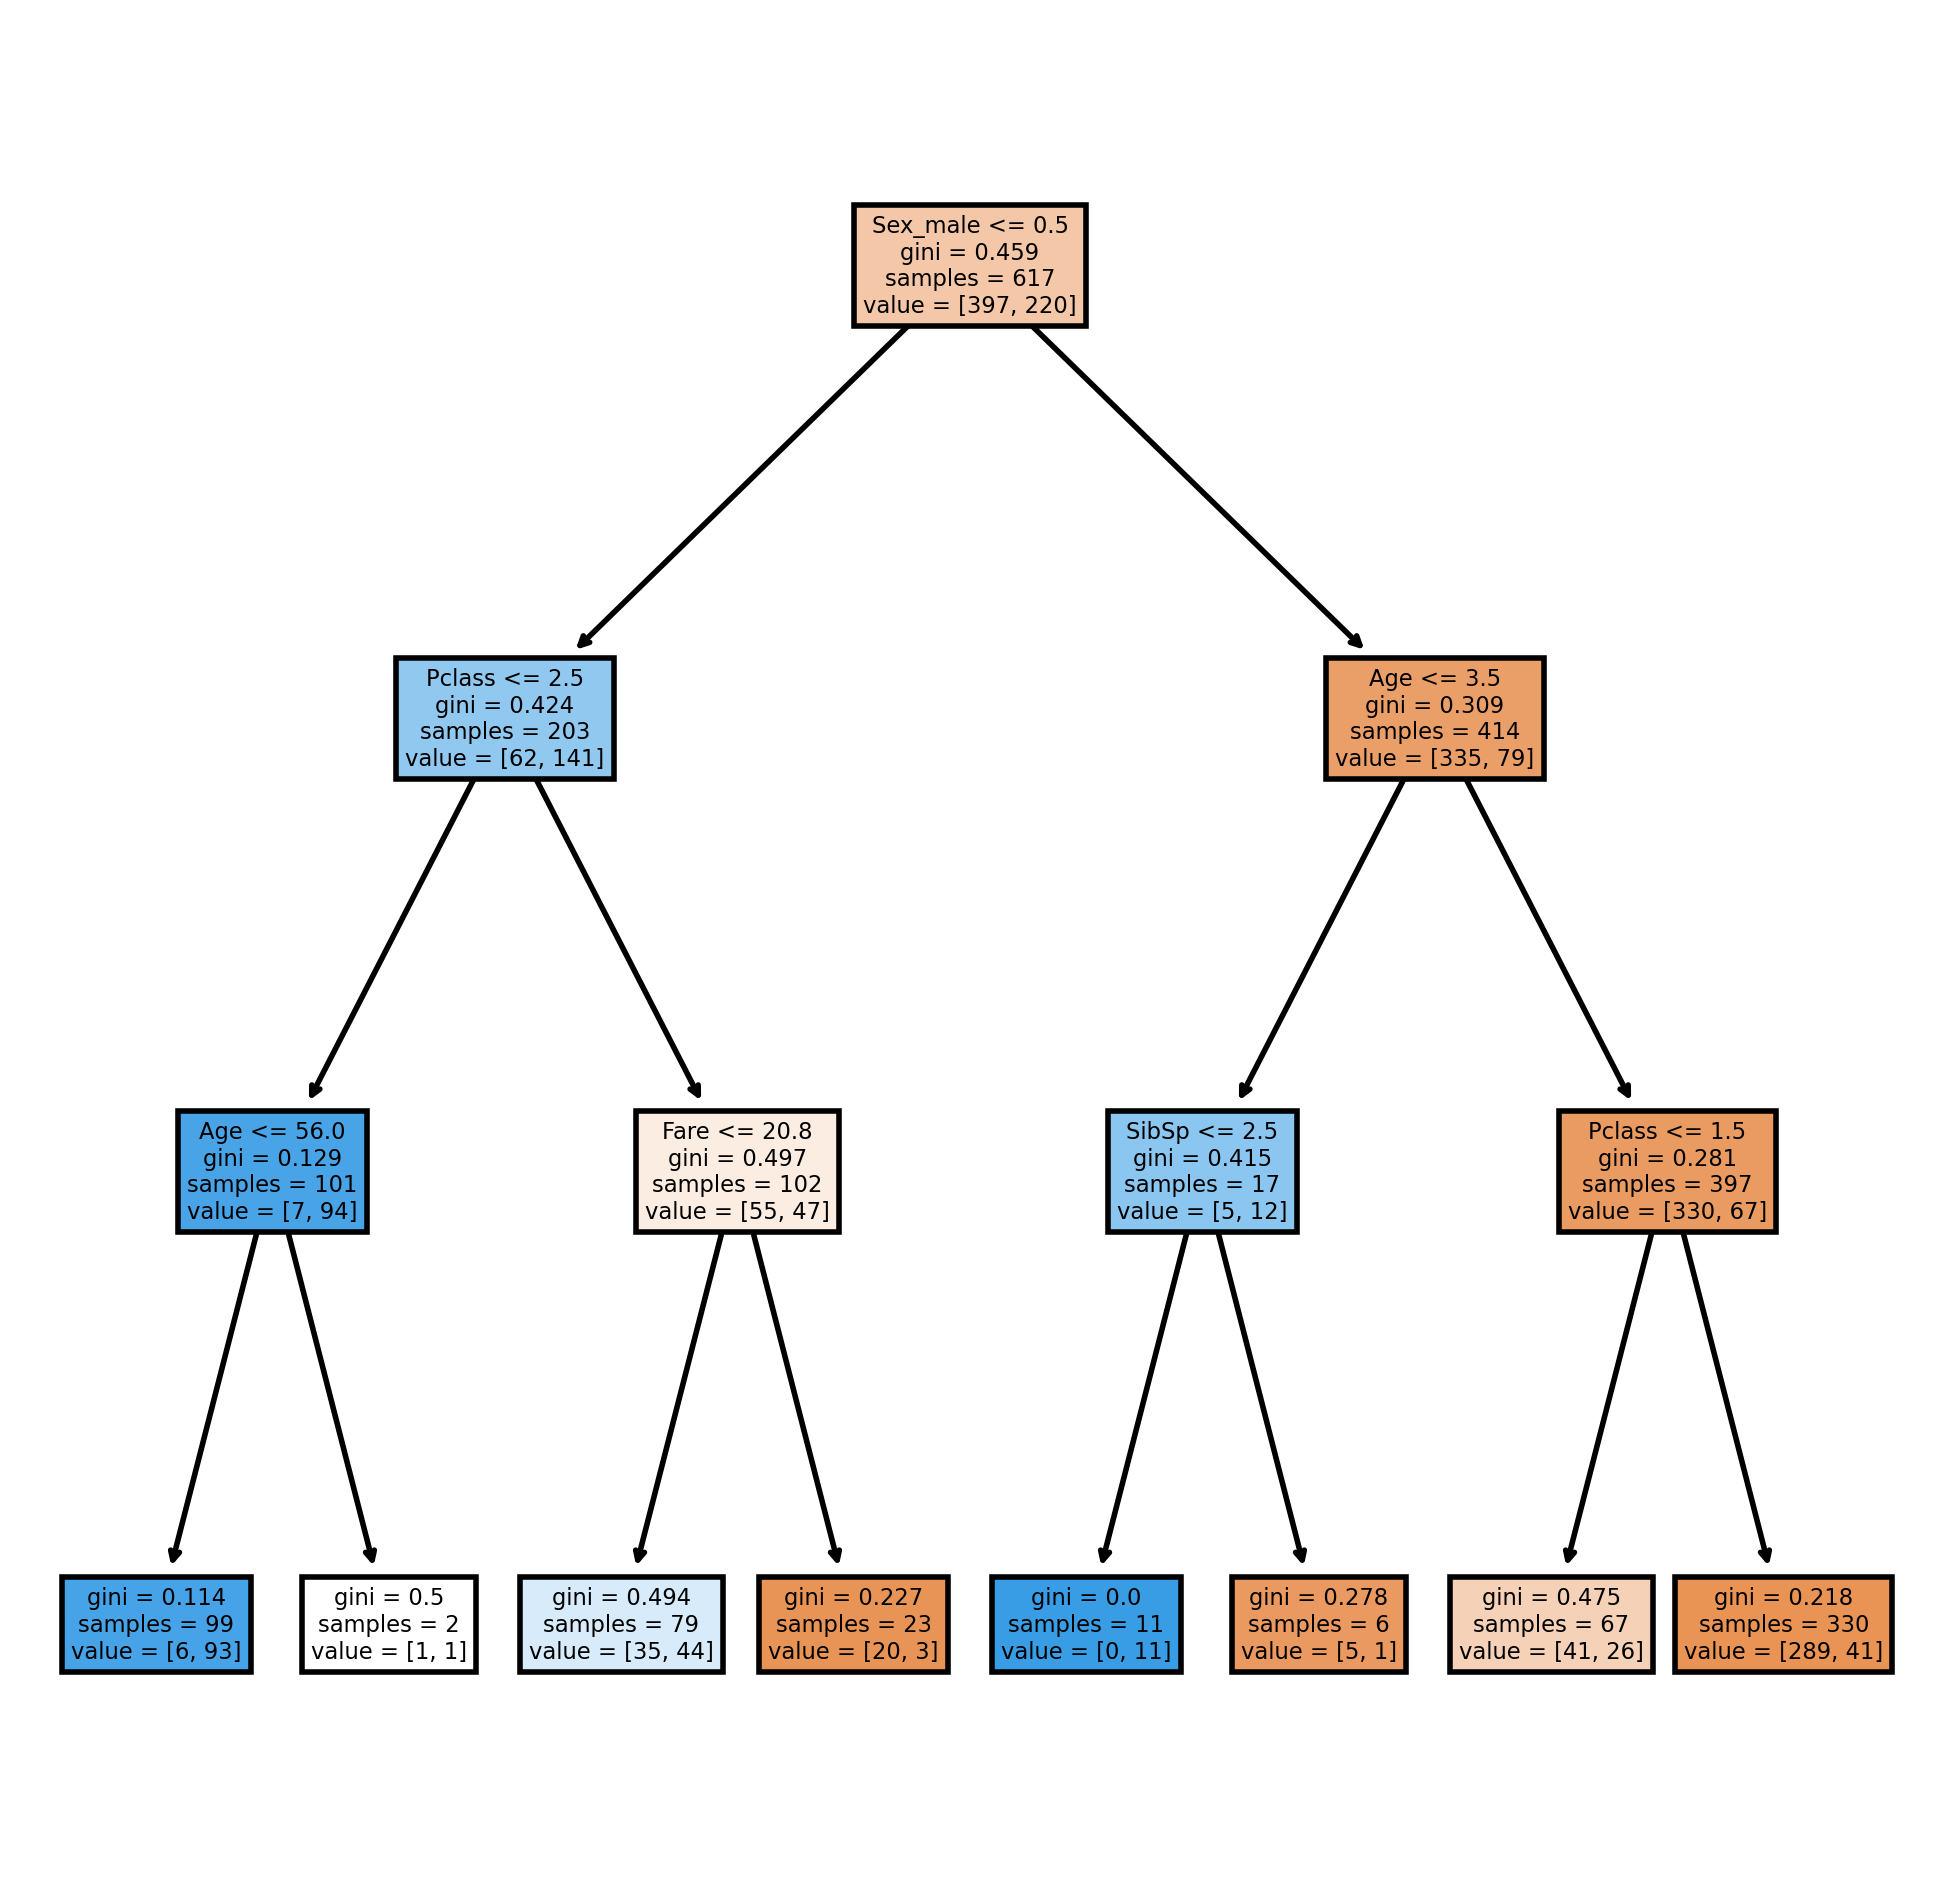

In [128]:
plt.rcParams.update({
    'font.sans-serif':'Microsoft JhengHei', 
    'axes.unicode_minus':False})

ap_feature_columns = list(train_dn.drop(["Survived","Name","Ticket"],axis=1).columns)
#cn = str(list(set(train_dn["Survived"])))
cn = list(set(train_dn["Survived"].astype("str")))


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=400)

tree.plot_tree(clf,
              #class_names=cn,
              feature_names=ap_feature_columns,
               filled=True
              );

fig.savefig('imagename2.png')

In [34]:
import graphviz 
from sklearn.tree import export_graphviz

dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=train_columns,  
                      #class_names=class_name,  
                      class_names = ['Died', 'Survived'],                                
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [ ]:
train_dn.drop(["Survived","Name","Sex","Ticket"],axis=1).columns

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('dark_background')
mpl.rcParams['text.color'] = 'black'
fig, ax = plt.subplots(figsize=(50, 50), facecolor='k')

#tree.export_graphviz(clf)
tree.plot_tree(clf) 
#plot_tree(clf, rotate=True, ax=ax); 
#plot_tree(clf,  ax=ax); 
#plt.show()

In [ ]:
from sklearn import tree

y = train_dn["Survived"]

x = train_dn.drop(["PassengerId","Survived","Name","Sex","Ticket"],axis=1)

clf = tree.DecisionTreeClassifier(max_depth=2)

clf = clf.fit(x, y)


#train_columns = list(train_dn.columns)
train_columns = list(train_dn.drop(["PassengerId","Survived","Name","Sex","Ticket"],axis=1).columns)



#for e in ("PassengerId","Survived","Name","Sex","Ticket"):
#    train_columns.remove(e)
    
train_columns

tree.plot_tree(clf,
                      feature_names = train_columns)

#train_dn["Survived"]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib as mpl
import graphviz 
from sklearn.tree import export_graphviz


#>>> clf = tree.DecisionTreeClassifier()
#>>> iris = load_iris()

#>>> clf = clf.fit(iris.data, iris.target)
tree.export_graphviz(clf,  out_file='tree.dot')  

dot_data = tree.export_graphviz(
        clf,
        out_file=None,
        filled=True,
        rounded=True,
        special_characters=True,
        feature_names=train_columns,
    )

graph = graphviz.Source(dot_data)
#graph


graphviz.Source(dot_data)





In [ ]:
train_dn_label = train_dn["Fare"]
train_dn_data = train_dn.drop('Fare',axis=1)

train_dn_data.info()

In [ ]:
train['Pclass'].value_counts()
train['Pclass'].value_counts().plot(kind='barh')

### dropna 排掉特定欄位有null的資料列

In [ ]:
train_exclude_age_null = train.dropna(subset=["Age"])
train_exclude_age_null = train_exclude_age_null.dropna(subset=["Embarked"])
train.dropna(subset=["Age"]).head(5)

In [ ]:
train_exclude_age_null.info()

### 把欄位轉為Dummy欄位

In [ ]:
train_exclude_age_null_dummy = pd.get_dummies(train_exclude_age_null, columns=['Sex','Embarked'])
train_exclude_age_null_dummy.head(3)

### exclude outlier

In [ ]:
print(train_exclude_age_null_dummy.describe())


Q1 = train_exclude_age_null_dummy.quantile(0.25)
Q3 = train_exclude_age_null_dummy.quantile(0.75)
IQR = Q3 - Q1

print(Q1["Fare"])
print(Q3["Fare"])
print(IQR["Fare"])

IQR

In [ ]:
train_exclude_age_null_dummy_exclude_fare_outlier = train_exclude_age_null_dummy[(train_exclude_age_null_dummy["Fare"]>=Q1["Fare"]-IQR["Fare"]*1.5) & (train_exclude_age_null_dummy["Fare"]<=Q3["Fare"]+IQR["Fare"]*1.5)]



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
reg = linear_model.LinearRegression()

#x = train_exclude_age_null_dummy[["Pclass","Age","SibSp","Parch","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S"]]#age & deposit_amt
x = train_exclude_age_null_dummy_exclude_fare_outlier[["Pclass","Age","SibSp","Parch","Sex_female","Sex_male"]]#age & deposit_amt
y = train_exclude_age_null_dummy_exclude_fare_outlier[["Fare"]]


reg.fit(x,y)

In [ ]:
import pandas as pd

a = reg.intercept_
print("intercept: {0}".format(a))

a = reg.coef_
print("coef_: {0}".format(a))

a = x.columns
print("columns: {0}".format(a))

#pd.DataFrame(reg.coef_ , x.columns, columns=['Coeffecient'])

#pd.DataFrame([-1.31057293e+01,  2.95302816e-03,  5.18698534e+00,  4.38318886e+00,
#   9.46721139e-02, -9.46721139e-02] ['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male'], columns=['Coeffecient'])

In [ ]:
a = train_exclude_age_null_dummy_exclude_fare_outlier['Fare'].head(3)
print("#1 {0}  \n".format(a))

a = train_exclude_age_null_dummy_exclude_fare_outlier.loc[:,['Fare']].head(3)
print("#2 {0}  \n".format(a))

train_exclude_age_null_dummy_exclude_fare_outlier.head(3)


In [ ]:
np.random.randn(2)

In [ ]:
#train_exclude_age_null_dummy_exclude_fare_outlier.loc[:,['Fare']] 

#train_exclude_age_null_dummy_exclude_fare_outlier['Fare_pre'] = reg.predict(x)
#a = reg.predict(x).shape
#print("#0 {0}  \n".format(a))

#a = train_exclude_age_null_dummy_exclude_fare_outlier.loc[:,['Fare']].shape
#print("#1 {0}  \n".format(a))


#a = train_exclude_age_null_dummy_exclude_fare_outlier.loc[0:,['Fare']].shape
#print("#2 {0}  \n".format(a))

#a = reg.predict(x)
#print("#3 {0}  \n".format(a))

a_index = train_exclude_age_null_dummy_exclude_fare_outlier.index

#print("#4 {0}  \n".format(a_index))

#y_hats2 = model.predict(X)
#df['y_hats'] = y_hats2

#df1['e'] = pd.Series(np.random.randn(sLength), index=df1.index)


Fare_pre = pd.DataFrame(data=reg.predict(x), index=a_index, columns=['Fare_pre'])
a = Fare_pre.head(10)
print("{0}".format(a))



train_exclude_age_null_dummy_exclude_fare_outlier['Fare_pre'] = reg.predict(x)
#train_exclude_age_null_dummy_exclude_fare_outlier['Fare_pre'] = pd.DataFrame(reg.predict(x), index=a_index)
#train_exclude_age_null_dummy_exclude_fare_outlier.loc[0:,['Fare_pre']]  = Fare_pre 
#train_exclude_age_null_dummy_exclude_fare_outlier.loc[0:,['Fare_pre']] = reg.predict(x)
#train_exclude_age_null_dummy_exclude_fare_outlier.loc[a_index, ['Fare_pre']] = reg.predict(x)
#train_exclude_age_null_dummy_exclude_fare_outlier.loc[0:,['Fare_pre']] = pd.Series(reg.predict(x),index=train_exclude_age_null_dummy_exclude_fare_outlier.index)
train_exclude_age_null_dummy_exclude_fare_outlier.head(5)

#train_exclude_age_null_dummy_exclude_fare_outlier.merge(Fare_pre, right_on='PassengerId', right_on='Fare_pre')



In [ ]:
reg.score(x,y) #驗證模型正確性,不同模型有不同的驗證指標
                     #linearRegression預設使用決定係數(R2)當作指標,越接近1越好

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=train['Age'], y=train['Fare'], c=train['Pclass'], label=train['Pclass'], alpha=0.6)
plt.legend()
plt.grid(True)
plt.show()

import numpy as np
np.random.seed(19680801)
import matplotlib.pyplot as plt


#train.head(3)
#train.describe()

In [ ]:
train.head(2).T

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Visualization

#columns: Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male'], dtype='object
sns.jointplot(x='Pclass',y ='Fare', data = train_exclude_age_null_dummy_exclude_fare_outlier)
sns.jointplot(x='Age',y ='Fare', data = train_exclude_age_null_dummy_exclude_fare_outlier)
sns.jointplot(x='SibSp',y ='Fare', data = train_exclude_age_null_dummy_exclude_fare_outlier)
sns.jointplot(x='Parch',y ='Fare', data = train_exclude_age_null_dummy_exclude_fare_outlier)
sns.jointplot(x='Sex_female',y ='Fare', data = train_exclude_age_null_dummy_exclude_fare_outlier)
sns.jointplot(x='Sex_male',y ='Fare', data = train_exclude_age_null_dummy_exclude_fare_outlier)